In [2]:
from data.load import load_data

data = load_data()

C:\Users\zachl\Eric's Projects\housing-bubble-index\src\data\load.py:41: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, new_rows], ignore_index=True)


<Axes: xlabel='date'>

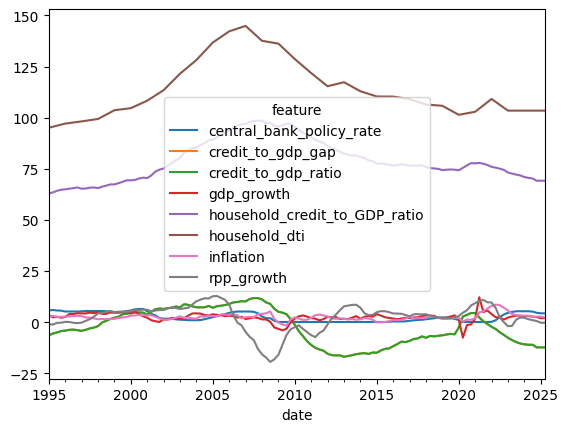

In [4]:
data["United States"].dropna().plot()

In [11]:
from statsmodels.tsa.stattools import adfuller

us_data = data["United States"].dropna()
X = us_data.drop(columns=["rpp_growth"])
y = us_data["rpp_growth"]

for feature in X.columns:
    if adfuller(X[feature])[1] <= 0.05:
        print(f"{feature} is stationary")
    else:
        print(f"{feature} is not stationary")
        X[f"{feature}_diff"] = X[feature].diff()
        X.drop(columns=[feature], inplace=True)

X = X.dropna()
y = y[X.index]

central_bank_policy_rate is not stationary
credit_to_gdp_gap is not stationary
credit_to_gdp_ratio is not stationary
gdp_growth is not stationary
household_credit_to_GDP_ratio is stationary
household_dti is not stationary
inflation is stationary


In [19]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    y,
    exog=X,
    order=(1, 1, 0)
)
results = model.fit()

print(results.summary())

                               SARIMAX Results                                
Dep. Variable:             rpp_growth   No. Observations:                  121
Model:               SARIMAX(1, 1, 0)   Log Likelihood                -169.281
Date:                Sat, 19 Jul 2025   AIC                            356.562
Time:                        15:25:37   BIC                            381.650
Sample:                    04-01-1995   HQIC                           366.751
                         - 04-01-2025                                         
Covariance Type:                  opg                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
household_credit_to_GDP_ratio     0.2050      0.208      0.984      0.325      -0.203       0.613
inflation                        -0.4857      0.116     -4.194      0.000 

In [20]:
results.params

household_credit_to_GDP_ratio    0.204993
inflation                       -0.485651
central_bank_policy_rate_diff   -0.034315
credit_to_gdp_gap_diff          -0.076889
credit_to_gdp_ratio_diff        -0.076889
gdp_growth_diff                 -0.019389
household_dti_diff               0.023379
ar.L1                            0.773331
sigma2                           0.976163
dtype: float64